## Work
1. 試比較有 BN 在 Batch_size = 2, 16, 32, 128, 256 下的差異
2. 請嘗試將 BN 放在 Activation 之前，並比較訓練結果
3. 請於 BN 放在 Input Layer 後，並比較結果

In [1]:
import os
import keras
import itertools
# Disable GPU
# os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:

def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = BatchNormalization()(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = [2, 16, 32, 128, 256]
MOMENTUM = 0.95

In [8]:
from keras.layers import BatchNormalization
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for batch_size in BATCH_SIZE:
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=batch_size, 
              validation_data=(x_test, y_test), 
              shuffle=True)

    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    exp_name_tag = "exp-batchsize-%s" % str(batch_size)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_1 (Batch (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_2 (Batch (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
batch_normalization_3 (Batch (None, 128)               512       
__________

50000/50000 [==============================] - 106s 2ms/step - loss: 2.2626 - acc: 0.1514 - val_loss: 3.7211 - val_acc: 0.2050
Epoch 48/50
50000/50000 [==============================] - 105s 2ms/step - loss: 2.2650 - acc: 0.1441 - val_loss: 4.5995 - val_acc: 0.1798
Epoch 49/50
50000/50000 [==============================] - 105s 2ms/step - loss: 2.2571 - acc: 0.1506 - val_loss: 3.0537 - val_acc: 0.1627
Epoch 50/50
50000/50000 [==============================] - 106s 2ms/step - loss: 2.2497 - acc: 0.1523 - val_loss: 3.8859 - val_acc: 0.1527
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_4 (Batch (None, 512)               2048 

50000/50000 [==============================] - 14s 277us/step - loss: 1.1097 - acc: 0.6059 - val_loss: 1.4030 - val_acc: 0.5092
Epoch 46/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.1131 - acc: 0.6066 - val_loss: 1.3807 - val_acc: 0.5175
Epoch 47/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.1044 - acc: 0.6074 - val_loss: 1.3583 - val_acc: 0.5328
Epoch 48/50
50000/50000 [==============================] - 14s 277us/step - loss: 1.0929 - acc: 0.6123 - val_loss: 1.3580 - val_acc: 0.5238
Epoch 49/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.0912 - acc: 0.6158 - val_loss: 1.3714 - val_acc: 0.5278
Epoch 50/50
50000/50000 [==============================] - 14s 276us/step - loss: 1.0851 - acc: 0.6156 - val_loss: 1.3850 - val_acc: 0.5175
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_4 (InputLayer)         (None, 3072

50000/50000 [==============================] - 7s 143us/step - loss: 0.8550 - acc: 0.6933 - val_loss: 1.5306 - val_acc: 0.5169
Epoch 44/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8502 - acc: 0.6960 - val_loss: 1.5660 - val_acc: 0.4969
Epoch 45/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8285 - acc: 0.7057 - val_loss: 1.6095 - val_acc: 0.4899
Epoch 46/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8234 - acc: 0.7060 - val_loss: 1.5275 - val_acc: 0.5150
Epoch 47/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8168 - acc: 0.7062 - val_loss: 1.5387 - val_acc: 0.5163
Epoch 48/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8092 - acc: 0.7094 - val_loss: 1.5700 - val_acc: 0.5057
Epoch 49/50
50000/50000 [==============================] - 7s 143us/step - loss: 0.8031 - acc: 0.7136 - val_loss: 1.6256 - val_acc: 0.4900
Epoch 50/50
50000/50000 [==============

Epoch 42/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.3403 - acc: 0.8829 - val_loss: 2.5276 - val_acc: 0.4455
Epoch 43/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.3362 - acc: 0.8855 - val_loss: 2.1396 - val_acc: 0.4862
Epoch 44/50
50000/50000 [==============================] - 3s 59us/step - loss: 0.3199 - acc: 0.8910 - val_loss: 2.5062 - val_acc: 0.4267
Epoch 45/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.3257 - acc: 0.8880 - val_loss: 2.2336 - val_acc: 0.4740
Epoch 46/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.3137 - acc: 0.8931 - val_loss: 2.2974 - val_acc: 0.4705
Epoch 47/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.3050 - acc: 0.8957 - val_loss: 2.4149 - val_acc: 0.4490
Epoch 48/50
50000/50000 [==============================] - 3s 60us/step - loss: 0.2927 - acc: 0.8995 - val_loss: 2.4809 - val_acc: 0.4696
Epoch 49/50
50000/50000 [=========

Epoch 41/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2725 - acc: 0.9192 - val_loss: 2.2224 - val_acc: 0.4625
Epoch 42/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2589 - acc: 0.9238 - val_loss: 2.2850 - val_acc: 0.4616
Epoch 43/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2482 - acc: 0.9264 - val_loss: 2.2916 - val_acc: 0.4614
Epoch 44/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2332 - acc: 0.9328 - val_loss: 2.4102 - val_acc: 0.4608
Epoch 45/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2259 - acc: 0.9344 - val_loss: 2.3751 - val_acc: 0.4630
Epoch 46/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2073 - acc: 0.9418 - val_loss: 2.6092 - val_acc: 0.4317
Epoch 47/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.2074 - acc: 0.9399 - val_loss: 2.4834 - val_acc: 0.4580
Epoch 48/50
50000/50000 [=========

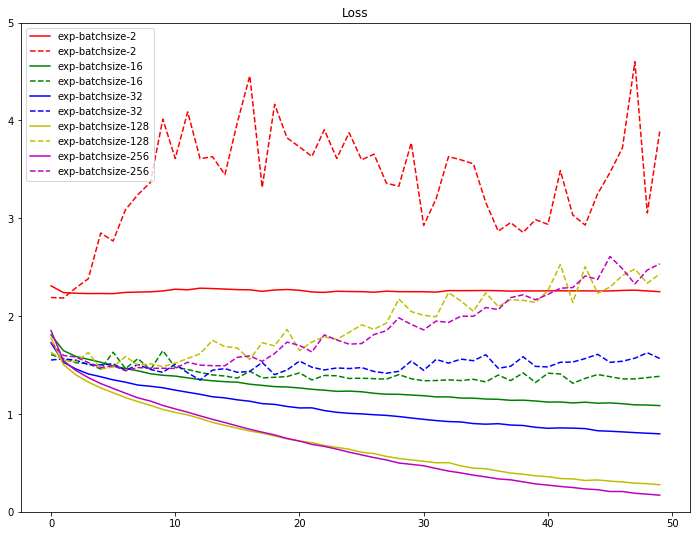

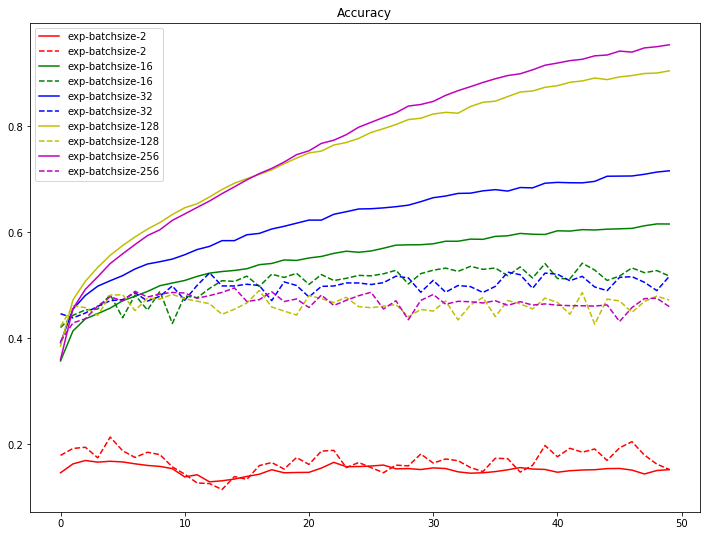

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
"""Code Here
將結果繪出
"""
color_bar = ["r", "g", "b", "y", "m", "k"]
plt.figure(figsize=(12,9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])), results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])), results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(12, 9))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [14]:
# BN before activation
def build_mlp_a(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units,
                                   name="hidden_layer"+str(i+1))(x)
        x = BatchNormalization()(x)
        x = keras.layers.Activation('relu')(x)
        
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [15]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [16]:
model = build_mlp_a(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_19 (Batc (None, 512)               2048      
_________________________________________________________________
activation_4 (Activation)    (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_20 (Batc (None, 256)               1024      
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
__________

50000/50000 [==============================] - 2s 43us/step - loss: 0.0359 - acc: 0.9973 - val_loss: 2.5423 - val_acc: 0.4854
Epoch 48/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.0357 - acc: 0.9969 - val_loss: 2.6209 - val_acc: 0.4709
Epoch 49/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.0379 - acc: 0.9966 - val_loss: 2.6506 - val_acc: 0.4833
Epoch 50/50
50000/50000 [==============================] - 2s 42us/step - loss: 0.0304 - acc: 0.9979 - val_loss: 2.5561 - val_acc: 0.4894


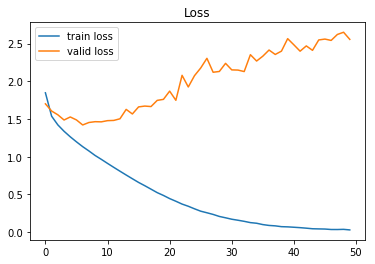

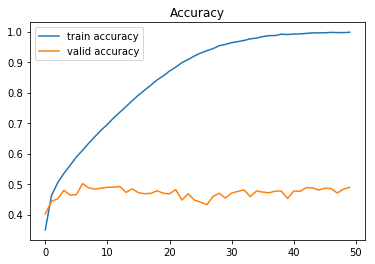

In [17]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()

In [19]:
# BN after input layer
def build_mlp_i(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    """Code Here
    建立你的神經網路
    """
    input_layer = keras.layers.Input(input_shape)
    x = BatchNormalization()(input_layer)
    
    for i, n_units in enumerate(num_neurons):
        x = keras.layers.Dense(units=n_units, 
                               activation="relu", 
                               name="hidden_layer"+str(i+1))(x)
        x = BatchNormalization()(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [20]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95

In [21]:
model = build_mlp_i(input_shape=x_train.shape[1:])
model.summary()
optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

model.fit(x_train, y_train, 
          epochs=EPOCHS, 
          batch_size=BATCH_SIZE, 
          validation_data=(x_test, y_test), 
          shuffle=True)

# Collect results
train_loss = model.history.history["loss"]
valid_loss = model.history.history["val_loss"]
train_acc = model.history.history["acc"]
valid_acc = model.history.history["val_acc"]

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
batch_normalization_22 (Batc (None, 3072)              12288     
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
batch_normalization_23 (Batc (None, 512)               2048      
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
batch_normalization_24 (Batc (None, 256)               1024      
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
__________

Epoch 49/50
50000/50000 [==============================] - 2s 45us/step - loss: 0.0354 - acc: 0.9947 - val_loss: 2.6300 - val_acc: 0.4996
Epoch 50/50
50000/50000 [==============================] - 2s 44us/step - loss: 0.0342 - acc: 0.9947 - val_loss: 2.6636 - val_acc: 0.5000


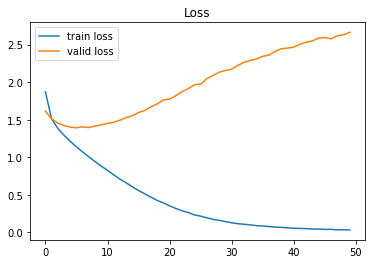

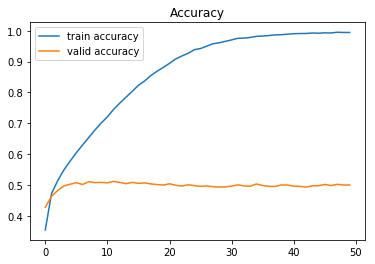

In [22]:
plt.plot(range(len(train_loss)), train_loss, label="train loss")
plt.plot(range(len(valid_loss)), valid_loss, label="valid loss")
plt.legend()
plt.title("Loss")
plt.show()

plt.plot(range(len(train_acc)), train_acc, label="train accuracy")
plt.plot(range(len(valid_acc)), valid_acc, label="valid accuracy")
plt.legend()
plt.title("Accuracy")
plt.show()